# Decision Tree (classification problems)

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [54]:
Dtdf= pd.read_csv("drug200.csv")
Dtdf[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [55]:
Dtdf.shape

(200, 6)

In [56]:
Xdata= Dtdf[['Age','Sex','BP','Cholesterol','Na_to_K']].values      #.. independent variable. Also we use '.values' to get just the
Xdata[0:5]                                                          # values of those columns in df.

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

# we can see that our dataset contains data which are categorical. ie;sex,BP, cholesterol columns. since decision tree can only handle numeric data we need to convert these categorical data to numeric data. So here we need to go for preprocessing. 

In [57]:
from sklearn import preprocessing
p_gender= preprocessing.LabelEncoder()
p_gender.fit(['F','M'])
Xdata[:,1]= p_gender.transform(Xdata[:,1])

p_BP= preprocessing.LabelEncoder()
p_BP.fit(['LOW','NORMAL','HIGH'])
Xdata[:,2]= p_BP.transform(Xdata[:,2])

p_chol= preprocessing.LabelEncoder()
p_chol.fit(['NORMAL','HIGH'])
Xdata[:,3]= p_chol.transform(Xdata[:,3])

Xdata[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

# now we can fill the target variale ie, Y variable(dependentV)

In [58]:
y= Dtdf['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

# Setting up the decision tree

In [59]:
from sklearn.model_selection import train_test_split

X_trainset,X_testset,Y_trainset,Y_testset= train_test_split(Xdata,y, test_size=0.3, random_state=3)

# in decisiontree classifier we have criterion and maxdepth

In [60]:
# modeling

drugtree=DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [61]:
# train the model using certain model mehod. In this case model is decision tree

drugtree.fit(X_trainset,Y_trainset)  

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [107]:
# prediction. Now predict the test set

pred_test= drugtree.predict(X_testset)
pred_test[0:8]

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA'], dtype=object)

In [108]:
pred_test[:2]

array(['drugY', 'drugX'], dtype=object)

In [63]:
# lets print the prdicted values and the actual values for the comparision

print("prediction: ",pred_test[0:5])
print("Actuals: ",Y_testset[0:5] )

prediction:  ['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
Actuals:  40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [65]:
# Evaluation. Looking at the accuracy. here we use accuracy_score

from sklearn import metrics
print("Accuracy of decision tree: ", metrics.accuracy_score(Y_testset,pred_test ))



Accuracy of decision tree:  0.9833333333333333


In [74]:
# now we got good accuarcy hence we can predcit the drug for any new patients. 

drugtree.predict([[40,0,1,1,17.55]])

array(['drugY'], dtype=object)

In [77]:

drugtree.predict([[40,1,0,1,18]])

array(['drugY'], dtype=object)

In [79]:
Dtdf.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC


In [82]:
X_testset[:2]

array([[73, 0, 2, 0, 19.221],
       [67, 1, 2, 1, 10.898]], dtype=object)

In [84]:
Y_testset[:3]

40     drugY
51     drugX
139    drugX
Name: Drug, dtype: object

In [92]:
Y_testset.unique()

array(['drugY', 'drugX', 'drugC', 'drugA', 'drugB'], dtype=object)

In [93]:
Y_testset[:3]

40     drugY
51     drugX
139    drugX
Name: Drug, dtype: object

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
82     drugC
183    drugY
46     drugA
70     drugB
100    drugA
179    drugY
83     drugA
25     drugY
190    drugY
159    drugX
173    drugY
95     drugX
3      drugX
41     drugB
58     drugX
14     drugX
143    drugY
12     drugY
6      drugY
182    drugX
161    drugB
128    drugY
122    drugY
101    drugA
86     drugX
64     drugB
47     drugC
158    drugC
34     drugX
38     drugX
196    drugC
4      drugY
72     drugX
67     drugX
145    drugX
156    drugA
115    drugY
155    drugC
15     drugY
61     drugA
175    drugY
120    drugY
130    drugY
23     drugY
153    drugX
31     drugB
103    drugX
89     drugY
132    drugX
109    drugY
126    drugY
17     drugA
30     drugX
178    drugY
162    drugX
Name: Drug, dtype: object

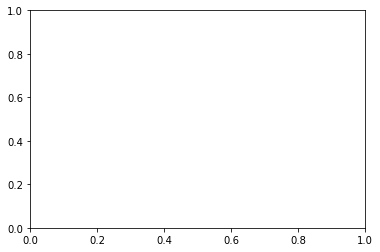

In [91]:
# we can also plot the graph. take age as x-axis and Na_to_K as y-axis and the actual values (Y_testset) as colrs to display

import matplotlib.pyplot as plt
plt.scatter(X_testset[:,0],X_testset[:,-1], c= Y_testset)

# we arent getting the proper output here coz Y_testset is still not transformed. so first we need to convert this to numeric

In [94]:
Y_testset.unique()

array(['drugY', 'drugX', 'drugC', 'drugA', 'drugB'], dtype=object)

In [95]:
Y_testset[:4]

40     drugY
51     drugX
139    drugX
197    drugX
Name: Drug, dtype: object

In [96]:
p_drug= preprocessing.LabelEncoder()
p_drug.fit(['drugY', 'drugX', 'drugC', 'drugA', 'drugB'])

Y_testset= p_drug.transform(Y_testset)

In [97]:
Y_testset

array([4, 3, 3, 3, 3, 2, 4, 0, 1, 0, 4, 0, 4, 4, 3, 4, 3, 3, 1, 3, 3, 4,
       4, 4, 3, 1, 4, 4, 0, 3, 1, 2, 2, 3, 3, 2, 4, 3, 3, 3, 0, 4, 2, 4,
       0, 4, 4, 4, 4, 3, 1, 3, 4, 3, 4, 4, 0, 3, 4, 3])

In [98]:
# now we got this data transformed to numeric. its ready for plotting now.. 

Y_testset[0:4]

array([4, 3, 3, 3])

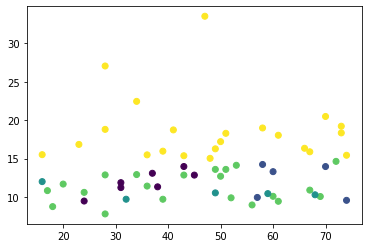

In [100]:
plt.scatter(X_testset[:,0],X_testset[:,4], c= Y_testset)

# this we plotted for actual data

In [110]:
pred_test[0:4]

array(['drugY', 'drugX', 'drugX', 'drugX'], dtype=object)

In [109]:
pred_test[:2]

array(['drugY', 'drugX'], dtype=object)

In [111]:
# now lets plot for our predicted data. we now have to again convert data to be feasible to the model

p_drug= preprocessing.LabelEncoder()
p_drug.fit(['drugY', 'drugX', 'drugC', 'drugA', 'drugB'])

pred_test= p_drug.transform(pred_test)

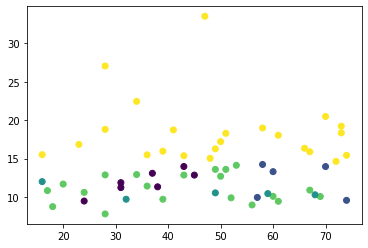

In [116]:
import matplotlib.pyplot as plt
plt.scatter(X_testset[:,0],X_testset[:,-1], c= pred_test) 

# i'm using -1 coz im doing the indexing from right, so -1 will be the last column, ie 'drug'